# Notebook to demonstrate plotting of station models

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.dates as dates
from mpl_toolkits.axes_grid1 import ImageGrid,make_axes_locatable,host_subplot
#from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta
import sys
import os
import pyPIPS.utils as utils
import pyPIPS.thermolib as thermo
import pyPIPS.DSDlib as dsd
#import pyPIPS.disdrometer_module as dis
import pyPIPS.plotmodule as PIPSplot
#import pyPIPS.simulator as sim
import pyPIPS.pips_io as pipsio
import pyPIPS.PIPS as pips
import pyPIPS.parsivel_params as pp
import pyPIPS.parsivel_qc as pqc
import pyPIPS.polarimetric as dualpol
import pyPIPS.timemodule as ptime
# from pyCRMtools.modules import plotmodule as plotmod
from pyCRMtools.modules import utils as CRMutils
# from pyCRMtools.pycaps import arps_read
# from pyCRMtools.pycaps import pycaps_fields
# from pyCRMtools.pycaps import calvars_radar as radar
%load_ext autoreload
%autoreload 2
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



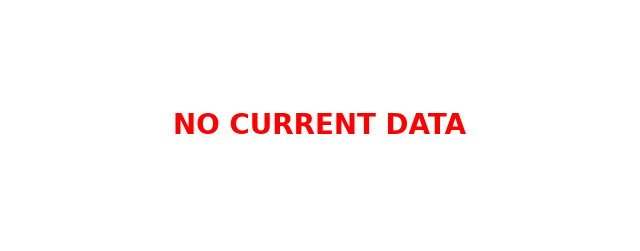

In [2]:
# Create a figure with the specified size (8 inches wide by 3 inches tall)
plt.figure(figsize=(8, 3))

# Add text in the middle of the plot
plt.text(0.5, 0.5, 'NO CURRENT DATA', fontsize=20, color='red', ha='center', va='center', fontweight='bold')

# Remove axes for a blank plot
plt.axis('off')

plt.savefig("no_data.png", dpi=300)

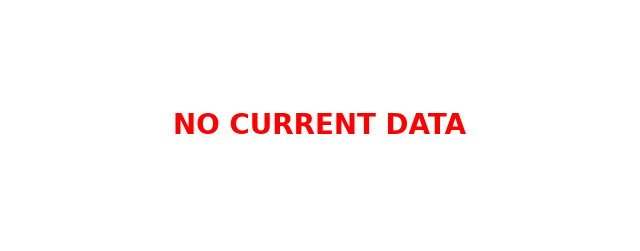

In [4]:
PIPS_with_no_current_data = ['PIPS1A', 'PIPS1B', 'PIPS2A']
plot_names = ['T_Td', 'VD', 'DSD', 'logND', 'pressure', 'wind']
web_image_dir = '/Users/dawson29/sshfs_mounts/stormlab_web/perils_realtime/images'

# Create a figure with the specified size (8 inches wide by 3 inches tall)
plt.figure(figsize=(8, 3))

# Add text in the middle of the plot
plt.text(0.5, 0.5, 'NO CURRENT DATA', fontsize=20, color='red', ha='center', va='center', fontweight='bold')

# Remove axes for a blank plot
plt.axis('off')

for PIPS in PIPS_with_no_current_data:
    for plot_name in plot_names:
        image_path = os.path.join(web_image_dir, f"{PIPS}_{plot_name}_current.png")
        plt.savefig(image_path, dpi=300)

In [ ]:
# date = '052516' # '053122' # '030622' # '061416'
# PIPS_dir = '/Users/dawson29/Dropbox/PIPS_data/2016/{}/netcdf'.format(date)
# PIPS_dir = '/Users/dawson29/Dropbox/Projects/PERiLS/PIPS_data/{}_IN_test/netcdf'.format(date)
# PIPS_dir = '/Users/dawson29/Dropbox/Projects/PERiLS/PIPS_data/IOP2_033022/netcdf'
# PIPS_dir = '/Users/dawson29/Dropbox/PIPS_data/2023/IOP2_030323/netcdf'
# PIPS_dir = '/Users/dawson29/Projects/PERiLS/obsdata/2023/PIPS_data/IOP3_032423/netcdf'
# PIPS_dir = '/Users/dawson29/Projects/PERiLS/obsdata/2023/PIPS_data/IOP4_033123/netcdf'
PIPS_dir = '/Users/dawson29/Projects/PERiLS/obsdata/2023/PIPS_data/IOP5_040523/netcdf'
# PIPS_dir = '/Users/dawson29/Dropbox/Teaching/2022/EAPS_591_SSFW/PIPS_data/{}/netcdf'.format(date)
# PIPS_dir = '/depot/dawson29/data/Projects/SPOTTR-2016/{}/obsdata/PIPS/netcdf'.format(date)
# PIPS_dir = '/Users/dawson29/Dropbox/PIPS_data/2016/SPOTTR2016/{}/netcdf'.format(date)
# PIPS_dir = '/Users/dawson29/PIPS_data/2023/031123_mass_test/netcdf'
# PIPS_dir = '/Users/dawson29/Dropbox/PIPS_data/2023/022223_mass_test/netcdf'
# PIPS_dir = '/Users/dawson29/PIPS_data/2023/031623_mass_test/netcdf'
# deployment_name = 'SPOTTR_{}'.format(date)
# deployment_name = '031123_mass_test'
# deployment_name = '022223_mass_test'
# deployment_name = '031623_mass_test'
# deployment_name = 'IOP3_032423'
# deployment_name = 'IOP4_033123'
deployment_name = 'IOP5_040523'
PIPS_names = ['PIPS1A', 'PIPS1B', 'PIPS2A', 'PIPS2B', 'PIPS3A', 'PIPS3B']
parsivel_interval = 10
parsivel_filenames = ['parsivel_combined_{}_{}_{:d}s.nc'.format(deployment_name, PIPS_name, parsivel_interval)
                      for PIPS_name in PIPS_names]
parsivel_filepaths = [os.path.join(PIPS_dir, parsivel_filename) for parsivel_filename in parsivel_filenames]
conv_filenames = ['conventional_raw_{}_{}.nc'.format(deployment_name, PIPS_name) for PIPS_name in PIPS_names]
conv_filepaths = [os.path.join(PIPS_dir, conv_filename) for conv_filename in conv_filenames]
parsivel_ds_read_dict = {}
conv_ds_read_dict = {}
for PIPS_name, parsivel_filepath, conv_filepath in zip(PIPS_names, parsivel_filepaths, conv_filepaths):
    try:
        parsivel_ds_read_dict[PIPS_name] = xr.load_dataset(parsivel_filepath)
    except:
        parsivel_ds_read_dict[PIPS_name] = None
    conv_ds_read_dict[PIPS_name] = xr.load_dataset(conv_filepath)

In [ ]:
for PIPS_name in PIPS_names:
    conv_ds = conv_ds_read_dict[PIPS_name]
    print(PIPS_name)
    print(conv_ds['time'][0].values, conv_ds['time'][-1].values)
    geo_loc = eval(str(conv_ds.location))
    lat = float(geo_loc[0])
    lon = float(geo_loc[1])
    alt = float(geo_loc[2])
    print(f'{lat:0.5f}, {lon:0.5f}, {alt:0.0f}')

In [ ]:
# Restrict to certain time range
# start_time = '2022-05-31T23:00' # '2022-03-07T00:00'
# end_time = '2022-06-01T00:05' # '2022-03-08T00:00'
# start_time = '2022-03-30T23:40'
# end_time = '2022-03-31T01:30'
# start_time = '2023-03-12T00:15'
# end_time = '2023-03-12T14:00'
# start_time = '2023-02-22T16:00'
# end_time = '2023-02-23T01:00'
# start_time = '2023-03-16T17:45'
# end_time = '2023-03-17T15:05'

if False:
    parsivel_ds_dict = {}
    conv_ds_dict = {}
    for PIPS_name in PIPS_names:
        try:
            parsivel_ds_dict[PIPS_name] = parsivel_ds_read_dict[PIPS_name].sel(time=slice(start_time, end_time))
        except AttributeError:
            parsivel_ds_dict[PIPS_name] = None
        conv_ds_dict[PIPS_name] = conv_ds_read_dict[PIPS_name].sel(time=slice(start_time, end_time))
else:
    parsivel_ds_dict = parsivel_ds_read_dict
    conv_ds_dict = conv_ds_read_dict

In [ ]:
parsivel_ds_dict['PIPS2A']

datetimes = parsivel_ds_dict['PIPS2A']['time'].to_index().to_pydatetime()

print(datetimes)

In [ ]:
# Get a particular time to plot
time_to_plot = '2023-04-05T17:00' # '2023-03-03T08:30'# '2022-03-31T00:15'
parsivel_ds_to_plot_dict = {}

for PIPS_name, parsivel_ds in parsivel_ds_dict.items():
    try:
        parsivel_ds_to_plot_dict[PIPS_name] = parsivel_ds.sel(time=time_to_plot, method='nearest')
    except AttributeError:
        parsivel_ds_to_plot_dict[PIPS_name] = None
    
obtime = parsivel_ds_to_plot_dict['PIPS2A']['time'].values
obtime = pd.to_datetime(obtime)
print(obtime)

# print(parsivel_ds_to_plot_dict)


In [ ]:
# Get a particular time to plot
time_to_plot = '2023-04-05T17:00' # '2023-03-03T08:30'# '2022-03-31T00:15'
conv_ds_to_plot_dict = {}

for PIPS_name, conv_ds in conv_ds_dict.items():
    try:
        conv_ds_to_plot_dict[PIPS_name] = conv_ds.sel(time=time_to_plot, method='nearest')
    except AttributeError:
        conv_ds_to_plot_dict[PIPS_name] = None
    
obtime = conv_ds_to_plot_dict['PIPS2A']['time'].values
obtime = pd.to_datetime(obtime)
print(obtime)


In [ ]:
T_list = []
Td_list = []
pressure_list = []
u_list = []
v_list = []
lats = []
lons = []
elevs = []

for PIPS_name, parsivel_ds in parsivel_ds_to_plot_dict.items():
    geo_loc_str = parsivel_ds.location
    geo_loc = list(map(float, geo_loc_str.strip('()').split(',')))
    lats.append(geo_loc[0])
    lons.append(geo_loc[1])
    elevs.append(geo_loc[2])
    
    T_list.append(parsivel_ds['fasttemp'].values)
    Td_list.append(parsivel_ds['dewpoint'].values)
    pressure_list.append(parsivel_ds['pressure'].values)
    u_list.append(parsivel_ds['uavg'].values)
    v_list.append(parsivel_ds['vavg'].values)

T_arr = np.array(T_list)
Td_arr = np.array(Td_list)
pressure_arr = np.array(pressure_list)
u_arr = np.array(u_list)
v_arr = np.array(v_list)
    

In [ ]:
conv_ds_to_plot_dict['PIPS1A']

In [ ]:
T_list = []
Td_list = []
pressure_list = []
u_list = []
v_list = []
lats = []
lons = []
elevs = []

for PIPS_name, conv_ds in conv_ds_to_plot_dict.items():
    geo_loc_str = conv_ds.location
    geo_loc = list(map(float, geo_loc_str.strip('()').split(',')))
    lats.append(geo_loc[0])
    lons.append(geo_loc[1])
    elevs.append(geo_loc[2])
    
    T_list.append(conv_ds['fasttemp'].values)
    Td_list.append(conv_ds['dewpoint'].values)
    pressure_list.append(conv_ds['pressure'].values)
    u = conv_ds['windspd'] * np.cos(np.deg2rad(-conv_ds['winddirabs'] + 270.))
    v = conv_ds['windspd'] * np.sin(np.deg2rad(-conv_ds['winddirabs'] + 270.))
    u_list.append(u.values)
    v_list.append(v.values)

T_arr = np.array(T_list)
Td_arr = np.array(Td_list)
pressure_arr = np.array(pressure_list)
u_arr = np.array(u_list)
v_arr = np.array(v_list)
    

In [ ]:
### find extent of plot
# exact center of plot
clat = np.amin(lats)+ abs(np.amax(lats) - np.amin(lats))/2
clon = np.amin(lons) + abs(np.amin(lons) - np.amax(lons))/2

# NOTE: change these hardcoded values if you want to change relative domain size
# larger (smaller) numbers = larger (smaller) domain
dlat = 0.75 * abs(np.amax(lats) - np.amin(lats))
dlon = 0.75 * abs(np.amin(lons) - np.amax(lons))


if dlon < .1:
    dlon = .1
if dlat < .1:
    dlat = .1

# find corners using the center and the buffers
north_lat, south_lat = clat+dlat, clat-dlat
west_lon, east_lon = clon-dlon, clon+dlon


In [ ]:
### initialize figure
fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(1,1,1, projection=crs)
ax.set_extent([west_lon, east_lon, north_lat,south_lat], crs )
ax.add_feature(states_provinces, edgecolor='k', alpha=0.25, linewidth=1)
ax.add_feature(USCOUNTIES.with_scale('20m'), alpha=0.4, linewidth=0.2)


# mark locations of SN
ax.plot(lons,lats,marker='s',color='0.4',markersize=5, linewidth=0)


# use metpy to plot T, Td, MSLP (coded), and the 4-letter identifiers
stationplot = StationPlot(ax, lons, lats, clip_on=True, transform=crs, fontsize=10)
stationplot.plot_parameter((-1.5,1), C_to_F(T_arr), color='#b30000', formatter='0.1f')
stationplot.plot_parameter((-1.5,-1), C_to_F(Td_arr), color='darkgreen', formatter='0.1f')
stationplot.plot_parameter((1.5,1), pressure_arr, formatter=lambda v: format(10 * v, '.0f')[-3:])
stationplot.plot_text((1.5, -.9), PIPS_names, fontsize=9, weight='bold')

# Add wind barbs, dropping bad vals, cuz WS can == -999
# u[abs(u)>60] = 0; v[abs(v)>60] = 0
ax.barbs(lons, lats, u_arr, v_arr, length=7.5, sizes={'emptybarb':.18}, lw=0.8)
                

### title
ax.set_title('Observations at {}'.format(obtime.strftime('%D %H:%M UTC')),
             fontsize=18, y=1.01, weight='bold', color='0.3')

### Plot the TTU logo, have it update location based on shape of base map
# plot_logo(fig, ax)


### Scale Bar
# find appropriate lenght of scale bar
# should be ~ 1/5th the width of the plot
# use 1 deg lon -> 111km approximation (10*10)
center = np.average([ax.get_position().x0, ax.get_position().x1])
#scale_len = np.ceil((abs(np.amin(lons) - np.amax(lons))*10)/4)*10

scale_len = np.ceil((dlon*10)/3.5)*10

if scale_len < 10:
    scale_len = 10
    

scale_bar(fig, ax, length=int(scale_len), location=(center, ax.get_position().y0))
#ax.text(center, 0.01, 'km', ha='center',fontsize=10, transform=ax.transAxes)

# save figure 
# savedir = 'RT_tests' # hard coded real time directory
# nametime = parse_currtime()[1] # note that this may be different from last time on plot
#                              # THATS OKAY... it will make data drops more apparent!
# plt.savefig('{0}/{1}_oban_{2}.png'.format(savedir,name,nametime),dpi=300,bbox_inches = 'tight')
# plt.close()

In [ ]:
## OLD CELLS BELOW ##

In [ ]:
# Try to use OpenStreetMap for images. Taken from 
# https://makersportal.com/blog/2020/4/24/geographic-visualizations-in-python-with-cartopy
import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image

In [ ]:
def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

In [ ]:
# cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
# osm_img = cimgt.OSM() # spoofed, downloaded street map
cimgt.QuadtreeTiles.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.QuadtreeTiles() # spoofed, downloaded street map

In [ ]:
# Specific to IOP2 2023, make a list of the unique locations (since we had pairs of PIPS collocated)

# IOP2 2023
# PIPS_names1 = ['PIPS1A', 'PIPS2A', 'PIPS3A']
# List of those PIPS Collocated with each of the above:
# PIPS_names2 = ['PIPS2B', 'PIPS1B', 'PIPS3B']

# IOP3 2023
# PIPS_names1 = ['PIPS2A', 'PIPS3A']
# PIPS_names2 = []

# IOP4 2023
# PIPS_names1 = ['PIPS1A', 'PIPS1B', 'PIPS3A', 'PIPS3B']
# PIPS_names2 = ['PIPS2A', 'PIPS2B']

# IOP5 2023
PIPS_names1 = ['PIPS1A', 'PIPS1B', 'PIPS2A', 'PIPS2B', 'PIPS3A', 'PIPS3B']
PIPS_names2 = []

lats1 = []
lats2 = []
lons1 = []
lons2 = []


for PIPS_name1 in PIPS_names1:
    conv_ds = conv_ds_to_plot_dict[PIPS_name1]
    geo_loc_str = conv_ds.location
    geo_loc = list(map(np.float, geo_loc_str.strip('()').split(',')))
    lats1.append(geo_loc[0])
    lons1.append(geo_loc[1])
    # elevs.append(geo_loc[2])

for PIPS_name2 in PIPS_names2:
    conv_ds = conv_ds_to_plot_dict[PIPS_name2]
    geo_loc_str = conv_ds.location
    geo_loc = list(map(np.float, geo_loc_str.strip('()').split(',')))
    lats2.append(geo_loc[0])
    lons2.append(geo_loc[1])
    # elevs.append(geo_loc[2])

In [ ]:
fig = plt.figure(figsize=(9,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
# location = eval(str(conv_ds.location))
center_pt = [clat, clon]
zoom = 0.12 # for zooming out of center point
lat_extent_mult = 1.5
extent = [center_pt[1]-(zoom*lat_extent_mult), center_pt[1]+(zoom*lat_extent_mult), 
          center_pt[0]-zoom, center_pt[0]+zoom] # adjust to zoom
ax1.set_extent(extent) # set extents
scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
print(scale)
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification
# NOTE: zoom specifications should be selected based on extent:
# -- 2     = coarse image, select for worldwide or continental scales
# -- 4-6   = medium coarseness, select for countries and larger states
# -- 6-10  = medium fineness, select for smaller states, regions, and cities
# -- 10-12 = fine image, select for city boundaries and zip codes
# -- 14+   = extremely fine image, select for roads, blocks, buildings

# mark locations of SN
ax1.scatter(lons, lats, marker='s', c='r', alpha=1, transform=ccrs.PlateCarree())

# For IOP2-2023 only, make two different station plots for each of the pairs, so that we can plot the text labels
# so they don't overlap. This is a pretty dumb hack but need something quick and dirty right now
stationplot1 = StationPlot(ax1, lons1, lats1, clip_on=True, transform=ccrs.PlateCarree(), fontsize=10)
if len(lons2) > 0:
    stationplot2 = StationPlot(ax1, lons2, lats2, clip_on=True, transform=ccrs.PlateCarree(), fontsize=10)
# stationplot.plot_parameter((-1.5,1), C_to_F(T_arr), color='#b30000', formatter='0.1f')
# stationplot.plot_parameter((-1.5,-1), C_to_F(Td_arr), color='darkgreen', formatter='0.1f')
# stationplot.plot_parameter((1.5,1), pressure_arr, formatter=lambda v: format(10 * v, '.0f')[-3:])
stationplot1.plot_text((2.75, -1.), PIPS_names1, fontsize=12, weight='bold', color='red')
if len(lons2) > 0:
    stationplot2.plot_text((2.75, -2.25), PIPS_names2, fontsize=12, weight='bold', color='red')

# for PIPS_name, conv_ds in conv_ds_dict.items():
#     lons = conv_ds['GPS_lon']
#     lons = lons.where(conv_ds['GPS_status'] == 'A', drop=True)
#     lats = conv_ds['GPS_lat']
#     lats = lats.where(conv_ds['GPS_status'] == 'A', drop=True)
#     times = conv_ds['time']
#     times = times.where(conv_ds['GPS_status'] == 'A', drop=True)
#     sc = ax1.scatter(lons, lats, c=times, marker='o', facecolor='none', alpha=1, transform=ccrs.PlateCarree())

# fig.colorbar(sc, ax=ax1)

# save figure 

plotdir = '/Users/dawson29/Dropbox/Projects/PERiLS/Documentation_for_EOL/'
plotname = f'{deployment_name}_overview.png'
plotpath = os.path.join(plotdir, plotname)
plt.savefig(plotpath, dpi=300, bbox_inches='tight')
# savedir = 'RT_tests' # hard coded real time directory
# nametime = parse_currtime()[1] # note that this may be different from last time on plot
#                              # THATS OKAY... it will make data drops more apparent!
# plt.savefig('{0}/{1}_oban_{2}.png'.format(savedir,name,nametime),dpi=300,bbox_inches = 'tight')
plt.show() # show the plot

In [ ]:
# Old cells below. Check if there is anything important there and then get rid of them

In [ ]:
# Set up map
width_x = 500. # m
width_y = 500. # m

location = eval(str(conv_ds.location))
ctrlat = location[0]
ctrlon = location[1]

trulon = ctrlon
trulat1 = 35.
trulat2 = 45.
projection = ccrs.LambertConformal(ctrlon, ctrlat, false_easting=width_x/2., false_northing=width_y/2.,
                                   standard_parallels=[trulat1, trulat2])

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': projection})

# ax.stock_img()
# Add coastlines and states
ax.coastlines()
land = feature.LAND
ax.add_feature(land) # , edgecolor='face', facecolor=feature.COLORS['land'])
states = feature.STATES
# states = feature.NaturalEarthFeature(category="cultural", scale="50m",
#                                      facecolor="none",
#                                      name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=1., edgecolor='k', alpha=0.5)
rivers = feature.RIVERS
ax.add_feature(rivers, linewidth=0.75, edgecolor='b', alpha=0.5)
ax.add_feature(feature.NaturalEarthFeature('cultural', 'roads', '10m'), facecolor='none', edgecolor='b')
# # Add counties if desired. TODO: add back more features here after testing

# # if runname == pc.runname_list[0] and time == time_list[0]:

# print("Reading counties from shapefile")
county_shapefile_location = '/Users/dawson29/Projects/pyCRMtools/data/shapefiles/county/countyp020'
counties = plotmod.read_shapefile(county_shapefile_location)
ax.add_feature(counties, linewidth=0.5, edgecolor='grey', alpha=0.5)

# Add urban areas
# urban_shapefile_location = '/Users/dawson29/Projects/pyCRMtools/data/shapefiles/urban2/tl_2008_us_cbsa'
# urban = plotmod.read_shapefile(urban_shapefile_location)
# ax.add_feature(urban, linewidth=0.5, facecolor='purple', edgecolor='none', alpha=0.25)

# Add more stuff from GADM database (EDIT: doesn't seem to add anything beyond counties)
# gadm_shapefile_location = '/Users/dawson29/Projects/pyCRMtools/data/shapefiles/gadm/gadm36_USA_2'
# gadm_shapes = plotmod.read_shapefile(gadm_shapefile_location)
# ax.add_feature(gadm_shapes, linewidth=0.5, edgecolor='purple', alpha=0.8)

ax.set_xlim(0., width_x)
ax.set_ylim(0., width_y)
# ax.scatter([ctrlon], [ctrlat], color='black', marker='o', facecolor='none', transform=ccrs.PlateCarree())

lons = conv_ds['GPS_lon']
lats = conv_ds['GPS_lat']
ax.scatter(lons, lats, color='black', marker='o', facecolor='none', alpha=0.75, transform=ccrs.PlateCarree())

In [ ]:
print(wind_dir_conv.coords['time'])
print(len(wind_dir_conv.time))
print(len(np.unique(wind_dir_conv.time.data)))
unique_times = np.unique(wind_dir_conv['time'])
print(unique_times)
duplicated = wind_dir_conv.indexes['time'].duplicated()
print(duplicated)
dup_indices = np.where(duplicated)[0]
print(dup_indices)
#duplicated = xr.DataArray(parsivel_ds_read.indexes['time'].duplicated())
duplicated_times = wind_dir_conv['time'].isel(time=dup_indices)
print(duplicated_times)
duplicated_times_only = wind_dir_conv.isel(time=dup_indices)
print(duplicated_times_only)

In [ ]:
time_diff = wind_spd_conv['time'].diff('time').astype(np.float)*1.e-9
print(time_diff)
out_of_order_times = time_diff.where(time_diff < 0, drop=True)['time']
print(out_of_order_times)

In [ ]:
int_indices = range(wind_spd_conv.sizes['time'])
print(wind_spd_conv.coords['time'].values)
int_ind_da = xr.DataArray(int_indices, coords=[('time', wind_spd_conv.coords['time'].values)])
print(int_ind_da)

In [ ]:
print(int_ind_da.sel(time='2017-04-30T20:40:18.000000000'))

In [ ]:
print(wind_spd_conv.isel(time=74415))
print(wind_spd_conv.isel(time=74416))
print(wind_spd_conv.isel(time=74417))
print(wind_spd_conv.isel(time=74418))

In [ ]:
time_diff = parsivel_ds['time'].diff('time').astype(np.float)*1.e-9
print(time_diff)
out_of_order_times = time_diff.where(time_diff < 0, drop=True)['time']
print(out_of_order_times)

In [ ]:
PIPS_dir2 = '/Volumes/scr_fast/Projects/VORTEXSE/obsdata/full_PIPS_dataset_new_test/'
parsivel_filepath2 = os.path.join(PIPS_dir, 'parsivel_combined_FMCW_2017_043017_PIPS2A_60s.nc')
conv_filepath2 = os.path.join(PIPS_dir, 'conventional_raw_FMCW_2017_043017_PIPS2A.nc')
parsivel_ds2 = xr.load_dataset(parsivel_filepath2)
conv_ds2 = xr.load_dataset(conv_filepath2)

In [ ]:
time_diff = parsivel_ds2['time'].diff('time').astype(np.float)*1.e-9
print(time_diff)
out_of_order_times = time_diff.where(time_diff < 0, drop=True)['time']
print(out_of_order_times)